# Assignment # 02


## Question No. 05:

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import combinations

Execution time for n=100: 0.135650 seconds
Execution time for n=300: 1.560439 seconds
Execution time for n=700: 10.238047 seconds
Execution time for n=1000: 12.073335 seconds
Execution time for n=2000: 61.382476 seconds


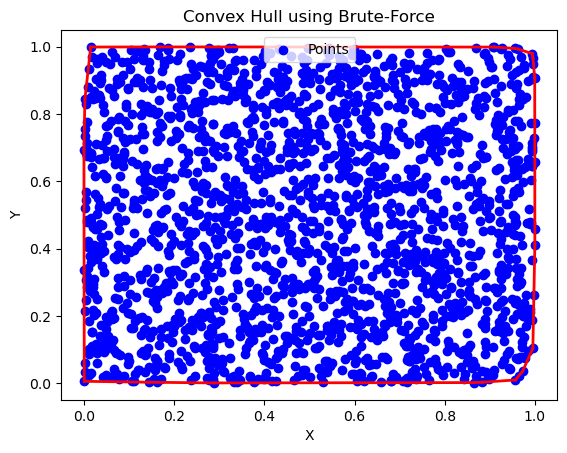

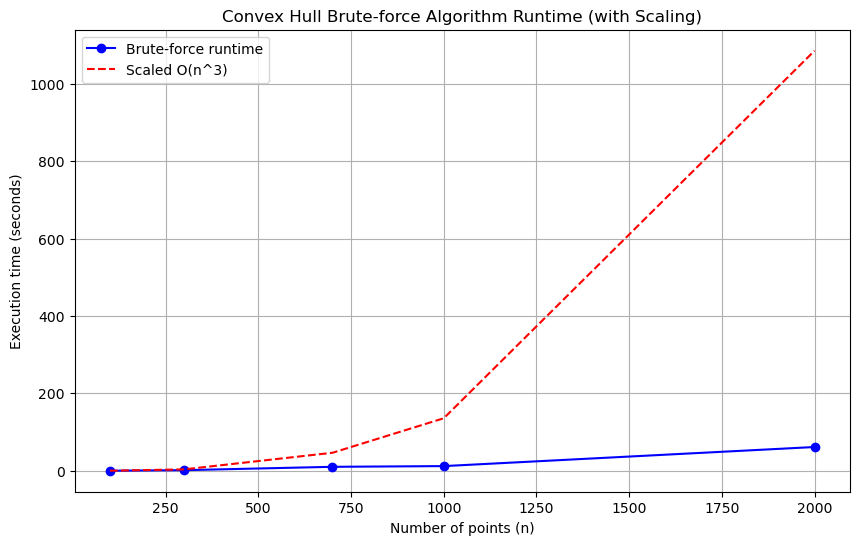

In [7]:
def generate_random_points(n):
    """
    Generate n random points uniformly distributed in a 2D plane.
    """
    points = np.random.rand(n, 2)  # Generates n random points (x, y) between 0 and 1
    return points

def cross_product(p1, p2, p3):
    """
    Compute the cross product of vectors (p2 - p1) and (p3 - p1).
    Determines the relative orientation of p3 with respect to the line segment p1p2.
    """
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def is_on_one_side(points, p1, p2):
    """
    Check if all points are on the same side of the line segment p1p2.
    """
    side = None
    for p in points:
        if np.array_equal(p, p1) or np.array_equal(p, p2):
            continue
        cp = cross_product(p1, p2, p)
        if side is None:
            side = np.sign(cp)
        elif np.sign(cp) != 0 and np.sign(cp) != side:
            return False
    return True

def brute_force_convex_hull(points):
    """
    Brute-force convex hull algorithm to find the smallest convex polygon containing all the points.
    Returns the edges that form the convex hull.
    """
    n = len(points)
    hull = []
    for p1, p2 in combinations(points, 2):
        if is_on_one_side(points, p1, p2):
            hull.append((p1, p2))
    return hull

def plot_convex_hull(points, hull):
    """
    Plot the points and the convex hull.
    """
    plt.scatter(points[:, 0], points[:, 1], label="Points", color="blue")

    # Plot each line segment that forms the convex hull
    for (p1, p2) in hull:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', linewidth=2)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Convex Hull using Brute-Force")
    plt.legend()
    plt.show()

def measure_runtime(n_values):
    """
    Measure the runtime of the brute-force convex hull algorithm for different values of n.
    """
    runtimes = []
    
    for n in n_values:
        points = generate_random_points(n)
        start_time = time.time()
        hull = brute_force_convex_hull(points)  # Get the convex hull pairs (edges)
        end_time = time.time()
        runtime = end_time - start_time
        runtimes.append(runtime)
        print(f"Execution time for n={n}: {runtime:.6f} seconds")
        
        # Plot the convex hull for the largest case (or any case you want to visualize)
        if n == n_values[-1]:  # Example: Only plot the largest case
            plot_convex_hull(points, hull)
    
    return runtimes

def plot_runtime(n_values, runtimes):
    """
    Plot the runtime of the brute-force algorithm and compare it with the theoretical O(n^3) complexity.
    """
    # Asymptotes: Scaling the O(n^3) curve to match the first measured runtime
    n_cubed_scaled = [(runtimes[0] / (n_values[0]**3)) * (n**3) for n in n_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, runtimes, label="Brute-force runtime", marker="o", color="blue")
    plt.plot(n_values, n_cubed_scaled, label="Scaled O(n^3)", linestyle="--", color="red")
    
    plt.xlabel("Number of points (n)")
    plt.ylabel("Execution time (seconds)")
    plt.title("Convex Hull Brute-force Algorithm Runtime (with Scaling)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    n_values = [100, 300, 700, 1000, 2000]
    # n_values = [100]
    runtimes = measure_runtime(n_values)
    plot_runtime(n_values, runtimes)


Execution time for n=100: 0.170079 seconds


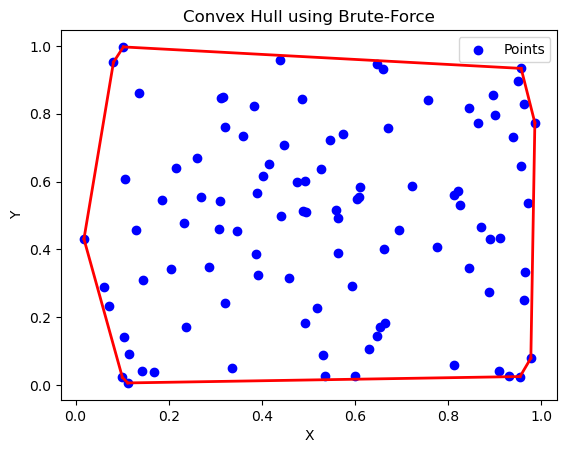

[0.17007899284362793]

In [8]:
measure_runtime([100])